# 作業
* 試著模擬出 5 群高斯分布的資料, 並以此觀察 K-mean 與輪廓分析的結果  

In [2]:
# 載入套件
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_samples, silhouette_score

np.random.seed(5)

%matplotlib inline

In [3]:
# 生成 5 群資料
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=5,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=123) 

In [4]:
# 設定需要計算的 K 值集合
range_of_clustering = [2,3,4,5,6,7,8,9,10]

In [36]:
def slope_mesure(a1,a2):
    dis = a2-a1
    return abs(dis)

For n_clusters = 2 The average silhouette_score is : 0.5027144446956527
dis = 0.0000
 
For n_clusters = 3 The average silhouette_score is : 0.6105565451092732
dis = 0.1078
 
For n_clusters = 4 The average silhouette_score is : 0.6270122040179333
dis = 0.0165
 
For n_clusters = 5 The average silhouette_score is : 0.6115749260799671
dis = 0.0154
 
For n_clusters = 6 The average silhouette_score is : 0.5499388428924794
dis = 0.0616
 
For n_clusters = 7 The average silhouette_score is : 0.4695416652197068
dis = 0.0804
 
For n_clusters = 8 The average silhouette_score is : 0.4231800504179843
dis = 0.0464
 
For n_clusters = 9 The average silhouette_score is : 0.3418836581839249
dis = 0.0813
 
For n_clusters = 10 The average silhouette_score is : 0.34139085049070866
dis = 0.0005
 


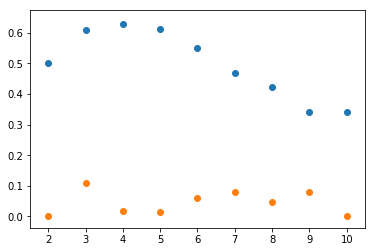

In [49]:
# 計算並繪製輪廓分析的結果
silhouette_result=[]
dis=[]
for n_clu in range_of_clustering:
#     fig, (ax1, ax2) = plt.subplots(1, 2)
#     fig.set_size_inches(18, 7)

#     # The 1st subplot is the silhouette plot
#     # The silhouette coefficient can range from -1, 1 but in this example all
#     # lie within [-0.1, 1]
#     ax1.set_xlim([-0.1, 1])
#     # The (n_clusters+1)*10 is for inserting blank space between silhouette
#     # plots of individual clusters, to demarcate them clearly.
#     ax1.set_ylim([0, len(X) + (n_clu + 1) * 10])
    
    cluster = KMeans(n_clu,random_state=10)
    clu_predict = cluster.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, clu_predict)
    print("For n_clusters =", n_clu,
          "The average silhouette_score is :", silhouette_avg)
    silhouette_value_sample = silhouette_samples(X, clu_predict)
    silhouette_result.append(silhouette_avg)
    d = abs(silhouette_result[n_clu-2]-silhouette_result[n_clu-3])
    dis.append(d)
    print(f"dis = {d:.4f}\n ")

ran = range(2,11)
plt.scatter(x= ran, y=silhouette_result)
plt.scatter(x= ran, y=dis)

#### 2, 5, 6, is better cluster results